## Import Libraries

In [1]:
# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
import missingno as msno
import os

# Metrics
from sklearn.metrics import mean_squared_error,r2_score

# preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Model_selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression,SGDRegressor

## Load The Dataset

In [2]:
# read CSV file using pandas
path = os.path.join(os.getcwd(),'housing.csv') # dataset_path
df_house = pd.read_csv(path) 

In [3]:
## show the head 
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
## show data info
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
## some statistics
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
## check missing values in DataFrame
# df_house.isna()
df_house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

       The Dataset contain 20640 rows and only 207 rows is null .

## Exploratory Data Analysis (EDA)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_9284\3443276307.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cnt = ocean_val_cnt[i]


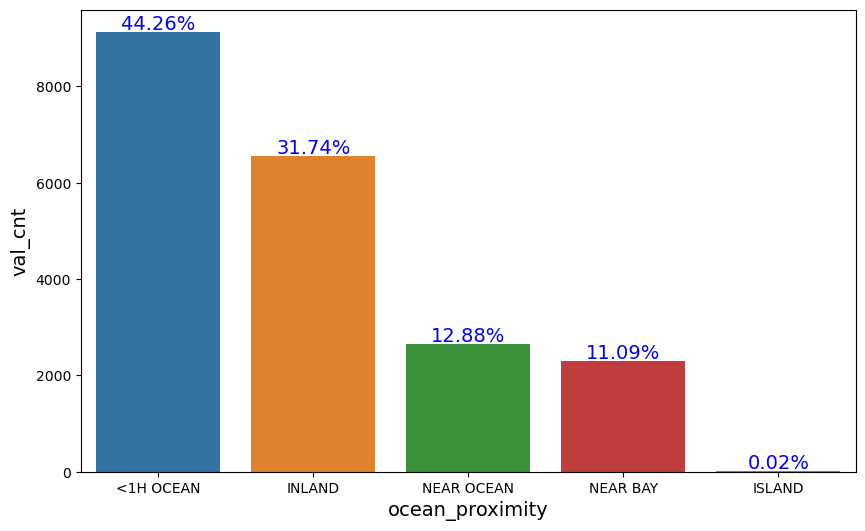

In [7]:
# univariate Visualizations
plt.figure(figsize=(10,6))
ocean_val_cnt = df_house['ocean_proximity'].value_counts()
sns.countplot(x='ocean_proximity',data=df_house,order=ocean_val_cnt.index);

plt.xlabel('ocean_proximity',fontsize = 14)
plt.ylabel('val_cnt',fontsize = 14)

## show the percentage of each value
for i in range(len(ocean_val_cnt)):
  cnt = ocean_val_cnt[i]
  txt = '{:.2f}%'.format(100*cnt/df_house.shape[0])
  """
  df_house.shape = number of rows or number of instances in dataset
  """

  plt.text(i,cnt+50,txt,ha='center',color='blue',fontsize = 14)
  """
  x = ocean_proximity
  y = val_cnt
  text : txt
  ha : position
  color 
  fontsize
  """


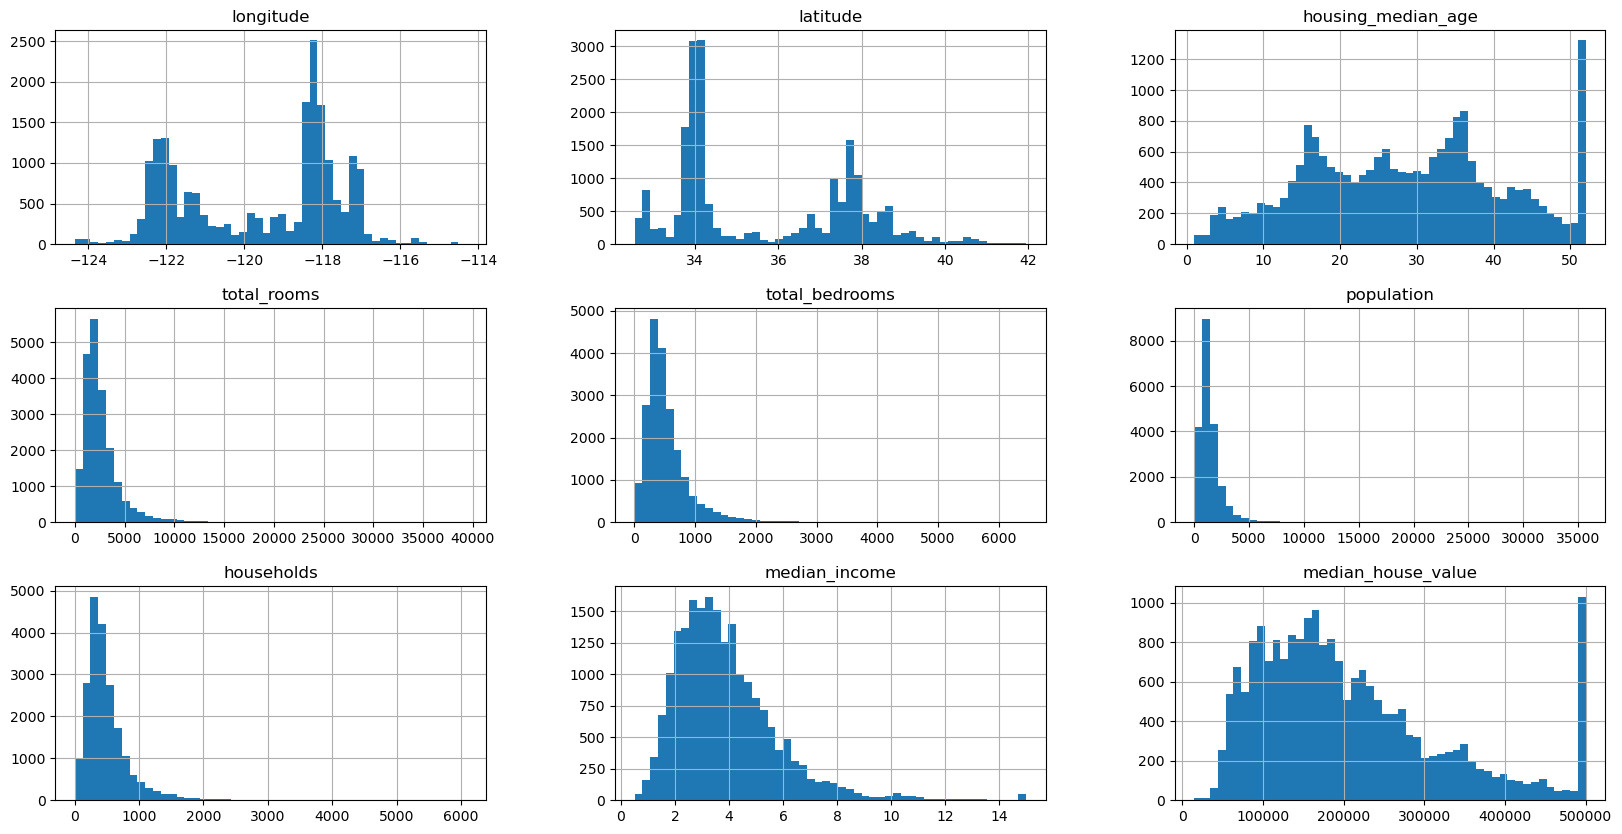

In [8]:
## histogram
df_house.hist(bins=50,figsize=(20,10));

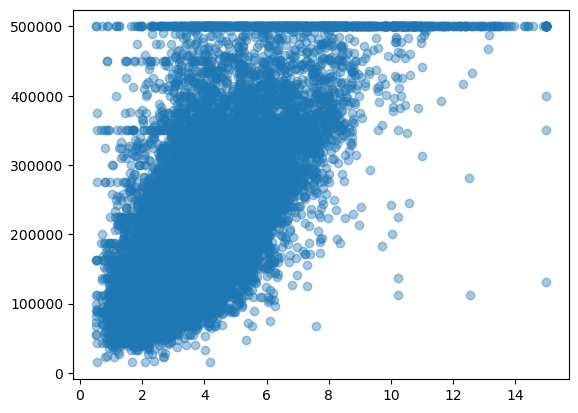

In [9]:
## scatter plot between median_income and median_house_value
plt.scatter(df_house['median_income'],df_house['median_house_value'],alpha=.4)
# sns.scatterplot(x= 'median_income' ,y= 'median_house_value',data=df_house)
# sns.relplot(kind='scatter',x= 'median_income' ,y= 'median_house_value',data=df_house)
plt.show()

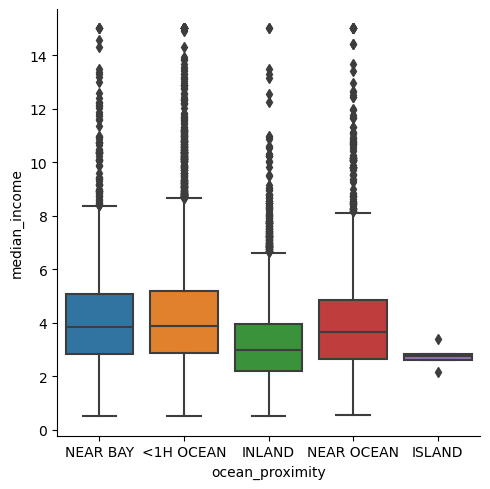

In [10]:
## Boxplot
sns.catplot(y='median_income',data=df_house,kind='box',x='ocean_proximity')

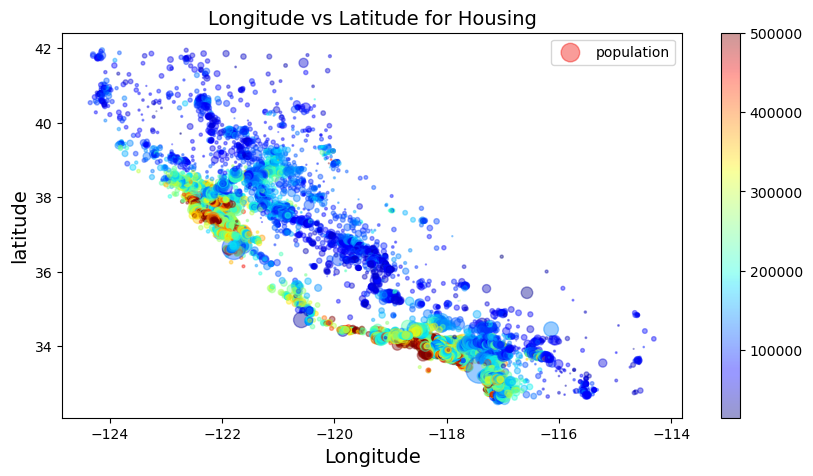

In [11]:
# scatter
plt.figure(figsize=(10,5)) # figure size

sc = plt.scatter(x=df_house['longitude'],y=df_house['latitude'],marker='o',alpha=.4
            ,s=df_house['population']/100,c=df_house['median_house_value']
            ,cmap=plt.get_cmap('jet'),label='population')
plt.colorbar(sc)
# c : color
# cmap : to make the color suitable .
# alpha : represent transparency

plt.xlabel('Longitude', fontsize=14) # x_title
plt.ylabel('latitude', fontsize=14) # y_title
plt.title('Longitude vs Latitude for Housing', fontsize=14,color='black') # title

plt.legend() # to show label 'population'
plt.show()

## Check The Correlation

In [12]:
## correlation
x = df_house.drop(columns=['ocean_proximity'],axis=1)


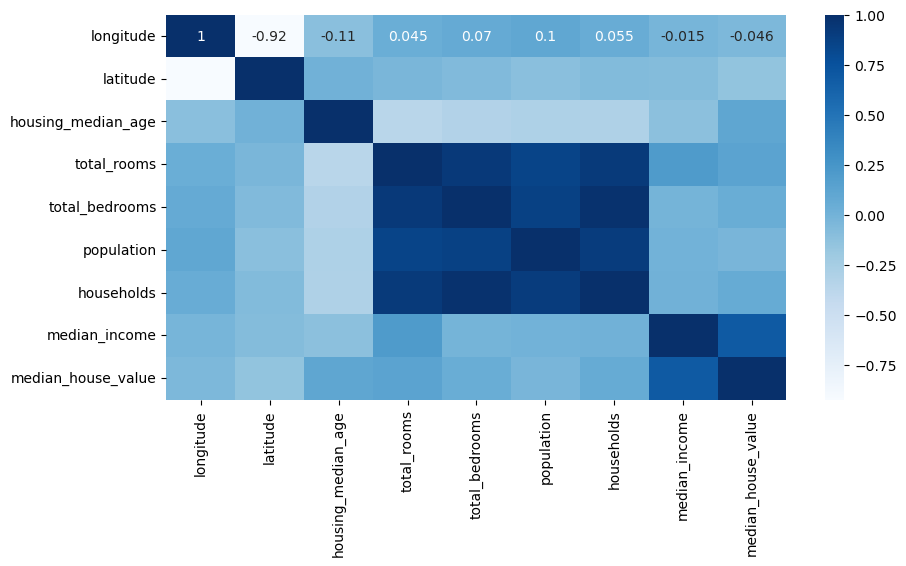

In [13]:
## Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(x.corr(), annot=True,cmap='Blues')
plt.show()

## Feature Engineering 

In [14]:
## Adding New Features caused from another Features and it can help to train model
df_house['rooms_per_household'] = df_house['total_rooms']/df_house['households']
df_house['bedrooms_per_rooms'] = df_house['total_bedrooms']/df_house['total_rooms']


## Split The Dataset

In [15]:
## split the dataset
x = df_house.drop(columns = 'median_house_value',axis=1) ## feature
y = df_house['median_house_value'] ## target

## split the training and test
x_train_full,x_test,y_train_full,y_test =train_test_split(x,y,test_size=.15,random_state=123,shuffle=True) ## random_state : reproduce the same result
## x_train_full : training + validation 
## x_test : test

## split the training and validation
x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,test_size=.15,random_state=123,shuffle=True)


## check the shape
print('x_train shape -- ',x_train.shape)
print('y_train shape -- ',y_train.shape)
print('x_valid shape -- ',x_valid.shape)
print('y_valid shape --',y_valid.shape)
print('x_test shape -- ',x_test.shape)
print('y_test shape --',y_test.shape)


x_train shape --  (14912, 11)
y_train shape --  (14912,)
x_valid shape --  (2632, 11)
y_valid shape -- (2632,)
x_test shape --  (3096, 11)
y_test shape -- (3096,)


In [16]:
## Numerical and Categorical columns
numerical_columns = []
categorical_columns = [] 
for col in df_house.columns:
  if df_house[col].dtype in ['int32','int64','float32','float64']:
    numerical_columns.append(col)
  else :
    categorical_columns.append(col)


In [17]:
numerical_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_rooms']

In [18]:
categorical_columns

['ocean_proximity']

# Features Processing
#### Dealing With Nulls

In [19]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  x_train.columns if x_train[col].dtype in ['float64','float32', 'int64','int32']]

categ_cols = [col for col in  x_train.columns if x_train[col].dtype not in ['float64','float32', 'int64','int32']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)


Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_rooms']
************************************************************
Categorical Columns : 
 ['ocean_proximity']


In [20]:
## Imputing
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train[num_cols])


## fit and transform training data,valid data and test data 
x_train_filled = imputer.fit_transform(x_train[num_cols])
x_valid_filled = imputer.transform(x_valid[num_cols])
x_test_filled = imputer.transform(x_test[num_cols])


In [21]:
## standardizations
(x_train_filled[:,0]/np.mean(x_train_filled[:,0]))/np.std(x_train_filled[:,0])
(x_valid_filled[:,0]/np.mean(x_valid_filled[:,0]))/np.std(x_valid_filled[:,0])
(x_test_filled[:,0]/np.mean(x_test_filled[:,0]))/np.std(x_test_filled[:,0])

array([0.50662135, 0.49179119, 0.4832401 , ..., 0.48266176, 0.48485118,
       0.49588085])

#### Standardizations


In [22]:
## standardizations
scaler = StandardScaler()
# scaler.fit(x_test_filled)

## fit and transform training data,valid data and test data 
x_train_scaled = scaler.fit_transform(x_train_filled)
x_valid_scaled = scaler.transform(x_valid_filled)
x_test_scaled = scaler.transform(x_test_filled)

In [23]:
## mean
scaler.mean_

array([-1.19568879e+02,  3.56305472e+01,  2.85702119e+01,  2.64014337e+03,
        5.38908069e+02,  1.42755841e+03,  5.00361387e+02,  3.87365351e+00,
        5.43575443e+00,  2.13258346e-01])

In [24]:
## mean
x_train_filled.mean(axis=0)

array([-1.19568879e+02,  3.56305472e+01,  2.85702119e+01,  2.64014337e+03,
        5.38908069e+02,  1.42755841e+03,  5.00361387e+02,  3.87365351e+00,
        5.43575443e+00,  2.13258346e-01])

### Building ML Model

##### Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_filled,y_train); ## train model

In [26]:
lin_reg.coef_, lin_reg.intercept_

(array([-4.14897549e+04, -4.10742501e+04,  1.14209624e+03,  2.49577080e+00,
         1.09861753e+01, -4.47845837e+01,  1.15983235e+02,  4.20604708e+04,
         2.78396768e+03,  3.03318587e+05]),
 -3572564.5714370944)

In [27]:
# prediction value
y_train_lin = lin_reg.predict(x_train_filled)
y_valid_lin = lin_reg.predict(x_valid_filled)

# rmse
rmse_train_lin = mean_squared_error(y_train,y_train_lin)**.5
rmse_valid_lin = mean_squared_error(y_valid,y_valid_lin)**.5

# r2_score
r_train_lin = r2_score(y_train,y_train_lin)
r_valid_lin = r2_score(y_valid,y_valid_lin)

print("RMSE using LinearRegression for Training : ",rmse_train_lin )
print("RMSE using LinearRegression for Validation : ",rmse_valid_lin )

print("*"*80)

print("r2_score using LinearRegression for Training : ",r_train_lin)
print("r2_score using LinearRegression for Validation : ",r_valid_lin)

RMSE using LinearRegression for Training :  68364.45182161553
RMSE using LinearRegression for Validation :  69022.44876855085
********************************************************************************
r2_score using LinearRegression for Training :  0.6471430908214684
r2_score using LinearRegression for Validation :  0.6417544184878403


##### Stochastic Gradient Descent Regression

In [28]:
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train_filled,y_train); ## train model

In [29]:
sgd_reg.coef_, sgd_reg.intercept_

(array([-1.69457362e+11, -1.67928792e+10, -2.36936183e+11, -3.97294598e+11,
        -5.67847787e+11,  4.04169076e+11, -5.03536836e+11, -7.80791816e+11,
        -1.36893216e+12,  2.33697695e+10]),
 array([1.33854871e+09]))

In [30]:
# prediction
y_train_sgd = sgd_reg.predict(x_train_filled)
y_valid_sgd = sgd_reg.predict(x_valid_filled)

# rmse
rmse_train_sgd = mean_squared_error(y_train,y_train_sgd)**.5
rmse_valid_sgd = mean_squared_error(y_valid,y_valid_sgd)**.5

# r2_score
r_train_sgd = r2_score(y_train,y_train_sgd)
r_valid_sgd = r2_score(y_valid,y_valid_sgd)

print("RMSE using SGDRegression for Training : ",rmse_train_sgd )
print("RMSE using SGDRegression for Validation : ",rmse_valid_sgd )

print("*"*80)

print("r2_score using LinearRegression for Training : ",r_train_sgd)
print("r2_score using LinearRegression for Validation : ",r_valid_sgd)

RMSE using SGDRegression for Training :  1364516614450851.8
RMSE using SGDRegression for Validation :  1363882131930985.8
********************************************************************************
r2_score using LinearRegression for Training :  -1.4057095980625132e+20
r2_score using LinearRegression for Validation :  -1.3987941136792692e+20
